In [1]:
!pip install statsbombpy
!pip install mplsoccer
!pip install highlight_text

from statsbombpy import sb
import pandas as pd
from highlight_text import ax_text, fig_text
from mplsoccer import VerticalPitch,Pitch
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.3 MB/s eta 0:00:00


In [46]:
path = '/content/drive/MyDrive/Colab Notebooks/MSc Data Analytics/Module 3/'

In [ ]:
# comps = sb.competitions()
# comps = comps.sort_values(by='season_name', ascending=False)
# comps.head(10)

In [2]:
euro_2024_df = sb.competition_events(
     country='Europe',
     division='UEFA Euro',
     season='2024',
     gender="male")

In [3]:
team_1 = 'Spain'
player_key = 'Fabián Ruiz Peña'
player_1 = 'Daniel Olmo Carvajal'
player_2 = 'Rodrigo Hernández Cascante'
player_3 = 'Martín Zubimendi Ibáñez'
player_4 = 'Pedro González López'

team_2 = 'England'
player_5 = 'Jude Bellingham'
player_6 = 'Declan Rice'
player_7 = 'Kobbie Mainoo'
player_8 = 'Conor Gallagher' # Cole Palmer
player_9 = 'Trent Alexander-Arnold'

team_3 = 'Germany'
player_10 = 'Jamal Musiala'
player_11 = 'Toni Kroos'
player_11 = 'Joshua Kimmich'
player_12 = 'İlkay Gündoğan'
player_13 = 'Florian Wirtz'

team_4 = 'France'
player_14 = 'Adrien Rabiot'
player_15 = "N'Golo Kanté"
player_16 = 'Aurélien Djani Tchouaméni'
player_17 = 'Eduardo Camavinga'

players = [player_key, player_1, player_2, player_3, player_4, player_5, player_6, player_7, player_8, player_9, player_10, player_11, player_12, player_13, player_14, player_15, player_16, player_17]

In [4]:
spain_events_df=euro_2024_df[euro_2024_df['team']==team_1]
england_events_df = euro_2024_df[euro_2024_df['team']==team_2]
germany_events_df = euro_2024_df[euro_2024_df['team']==team_3]
france_events_df = euro_2024_df[euro_2024_df['team']==team_4]

In [5]:
events_df = pd.concat([spain_events_df, england_events_df, germany_events_df, france_events_df])

In [6]:
events_df = events_df[events_df['player'].isin(players)]

In [7]:
# events_df['pass_shot_assist'].value_counts()

In [ ]:
# events_df[events_df['substitution_outcome'] == 'Tactical'][['team', 'substitution_replacement']]


In [8]:
defensive_features = ['duel_outcome', 'duel_type', 'interception_outcome', 'position', 'under_pressure']
midfield_features = ['pass_goal_assist', 'pass_outcome', 'pass_type', 'position', 'under_pressure', 'pass_shot_assist', 'ball_receipt_outcome', 'dribble_outcome']
attacking_features = ['shot_outcome', 'shot_statsbomb_xg', 'shot_type', 'type']
general_features = ['location', 'pass_end_location', 'carry_end_location', 'player']


key_features = defensive_features + midfield_features + attacking_features + general_features

In [9]:
events_df = events_df[key_features]

In [10]:
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)

In [104]:
event = 'shot_statsbomb_xg'

In [105]:
# Filter rows where the xG value is not NaN
xG_events_df = events_df[events_df[event].notna()]

# Group by player and sum the xG values
xG_events_df = xG_events_df.groupby('player')[event].sum().reset_index()

# Sort the players by their total xG in descending order
xG_events_df = xG_events_df.sort_values(by=event, ascending=False)

# Get the top 5 players with the highest xG
xG_events_df.head(5)

,player,shot_statsbomb_xg
9,Jude Bellingham,1.447654
2,Daniel Olmo Carvajal,1.378103
5,Fabián Ruiz Peña,1.154685
14,Trent Alexander-Arnold,0.908294
7,Jamal Musiala,0.900964


In [11]:
final_third_event = 'Shot' # Pass, Ball Recovery, Duel, Shot, Dribble

In [12]:
final_third_shots = events_df[(events_df.type==final_third_event)&(events_df['shot_type'] != 'Penalty')]

In [28]:
final_third_shots_count = final_third_shots.groupby(['player']).size().reset_index(name='Shots')
# final_third_shots_count = final_third_shots.groupby(['player', 'shot_outcome', 'shot_type']).size().reset_index(name='Shots')

In [29]:
final_third_shots_count = final_third_shots_count.sort_values(by='Shots', ascending=False)

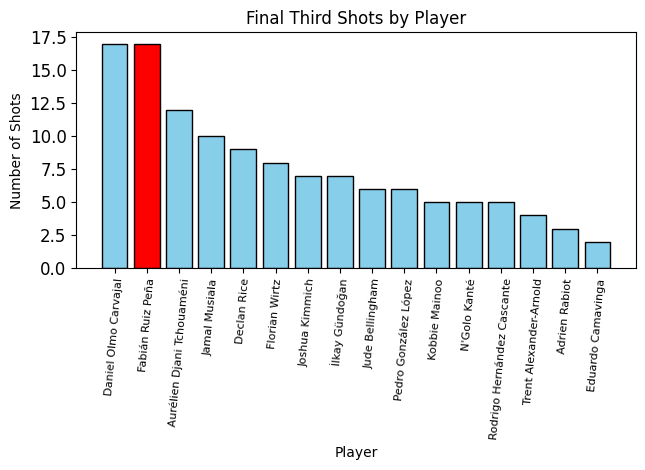

In [47]:
# Create a color list for bars
colors = ['red' if player == player_key else 'skyblue' for player in final_third_shots_count['player']]

# Plotting the bar chart
plt.bar(final_third_shots_count['player'], final_third_shots_count['Shots'], color=colors, edgecolor='black')

# Adding titles and labels
plt.title('Final Third Shots by Player')
plt.xlabel('Player')
plt.ylabel('Number of Shots')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=85, fontsize=8)
plt.yticks(fontsize=12)

# Adjusting layout
plt.tight_layout()

# Save the plot as an image
plt.savefig(path+'final_third_shots_chart.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

# Display the plot
plt.show()

In [48]:
final_third_goals = events_df[(events_df.type==final_third_event)&(events_df['shot_type'] != 'Penalty')&(events_df['shot_outcome'] == 'Goal')]

In [49]:
final_third_goals_count = final_third_goals.groupby(['player']).size().reset_index(name='Goals')

In [52]:
final_third_goals_count = final_third_goals_count.sort_values(by='Goals', ascending=False)

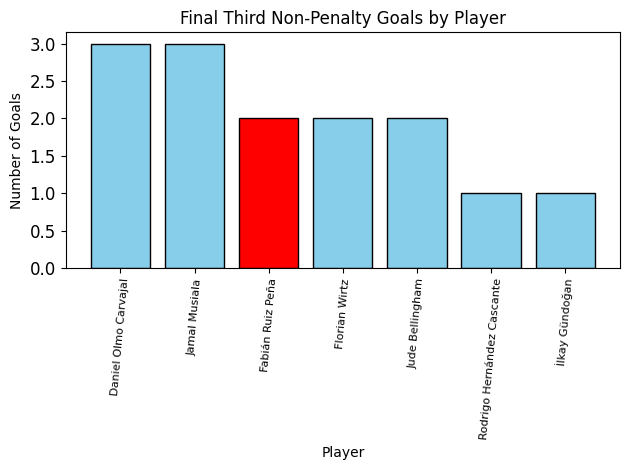

In [55]:
# Create a color list for bars
colors = ['red' if player == player_key else 'skyblue' for player in final_third_goals_count['player']]

# Plotting the bar chart
plt.bar(final_third_goals_count['player'], final_third_goals_count['Goals'], color=colors, edgecolor='black')

# Adding titles and labels
plt.title('Final Third Non-Penalty Goals by Player')
plt.xlabel('Player')
plt.ylabel('Number of Goals')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=85, fontsize=8)
plt.yticks(fontsize=12)

# Adjusting layout
plt.tight_layout()

# Save the plot as an image
plt.savefig(path+'final_third_goals_chart.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

# Display the plot
plt.show()

In [57]:
final_third_event = 'Pass' # Pass, Ball Recovery, Duel, Shot, Dribble

In [58]:
final_third_passes = events_df[(events_df.type==final_third_event)&(events_df.x<80)&(events_df.pass_end_x>80)&(events_df.pass_outcome.isna())]

In [59]:
final_third_passes_count = final_third_passes.groupby(['player']).size().reset_index(name='Passes')

In [60]:
final_third_passes_count = final_third_passes_count.sort_values(by='Passes', ascending=False)

In [61]:
final_third_event = 'Carry' # Pass, Ball Recovery, Duel, Shot, Dribble

In [62]:
final_third_carries = events_df[((events_df.type==final_third_event)&(events_df.x<80)&(events_df.carry_end_x>80))]

In [63]:
final_third_carries_count = final_third_carries.groupby(['player']).size().reset_index(name='Carries')

In [64]:
final_third_carries_count.sort_values(by='Carries', ascending=False)

,player,Carries
10,Jude Bellingham,25
8,Jamal Musiala,19
13,N'Golo Kanté,17
0,Adrien Rabiot,14
3,Daniel Olmo Carvajal,14
7,Florian Wirtz,12
6,Fabián Ruiz Peña,11
9,Joshua Kimmich,11
4,Declan Rice,8
14,Pedro González López,8


In [65]:
progressions_df = pd.merge(final_third_passes_count, final_third_carries_count, on='player', how='outer')

In [66]:
progressions_df = progressions_df.fillna(0)

In [67]:
progressions_df['Total'] = progressions_df['Passes']+progressions_df['Carries']

In [68]:
progressions_df = progressions_df.sort_values(by='Total', ascending=False)

<Figure size 1500x1500 with 0 Axes>

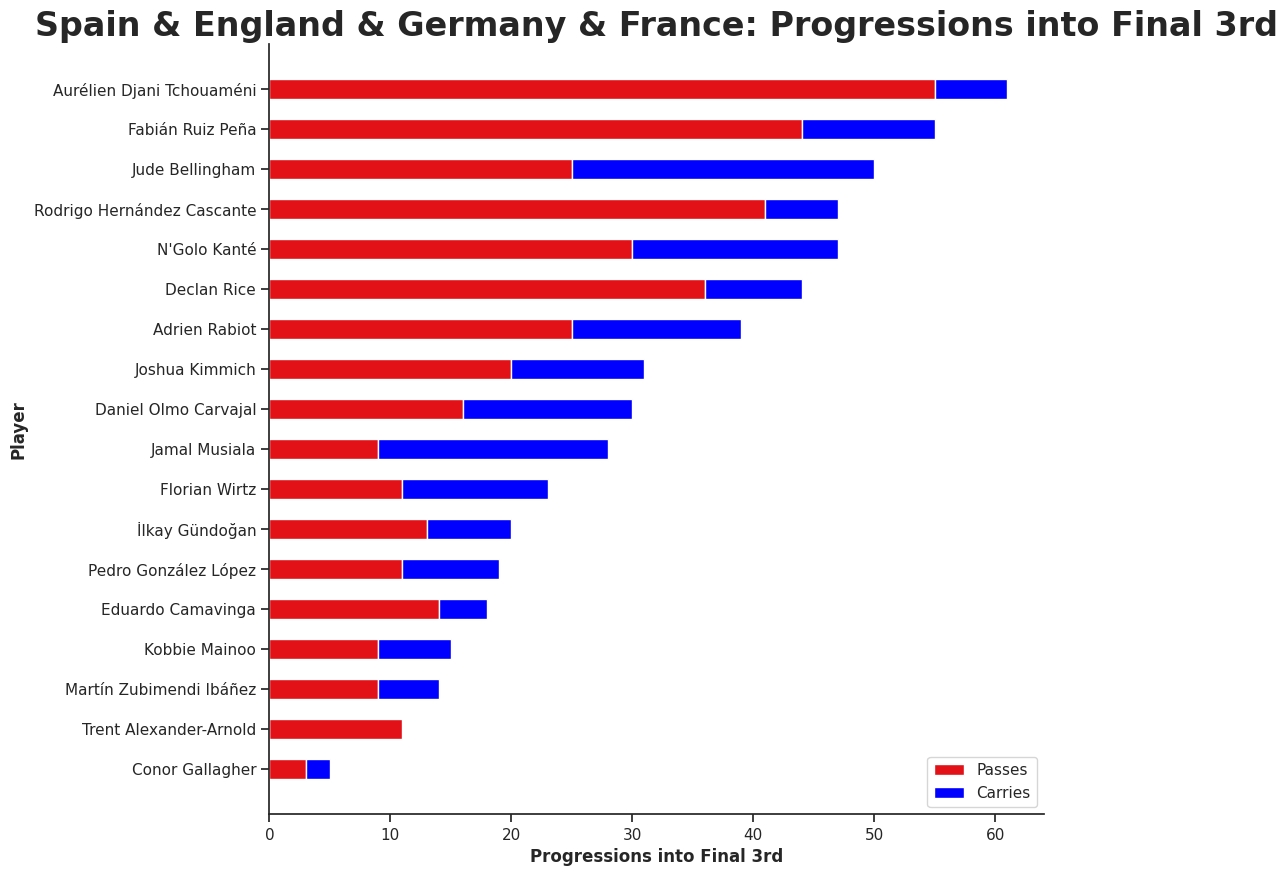

In [69]:
#create stacked bar chart
pass_colour='#e21017'
carry_colour='blue'

#sort to get lowest values first (so that it plots in the correct order on our bar chart)
progressions_df.sort_values(by='Total', ascending=True, inplace=True)

#include only relevant columns
barchart_df=progressions_df[["player", "Passes", "Carries"]]


#create figure and set some style parameters
plt.figure(figsize = (15,15))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks")

#create bar chart
barchart_df.set_index('player').plot(kind='barh', stacked=True,color=[pass_colour, carry_colour],legend=True,figsize=(10,10))

#add chart labels and title
plt.xlabel(xlabel="Progressions into Final 3rd",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.ylabel(ylabel="Player",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.title(f"{team_1} & {team_2} & {team_3} & {team_4}: Progressions into Final 3rd",fontdict = { 'fontsize': 24, 'weight':'bold'})

#keep two axes
sns.despine(top=True, right=True, left=False, bottom=False)
plt.autoscale()

# Save the plot as an image
plt.savefig(path+'final_third_progressions_chart.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()

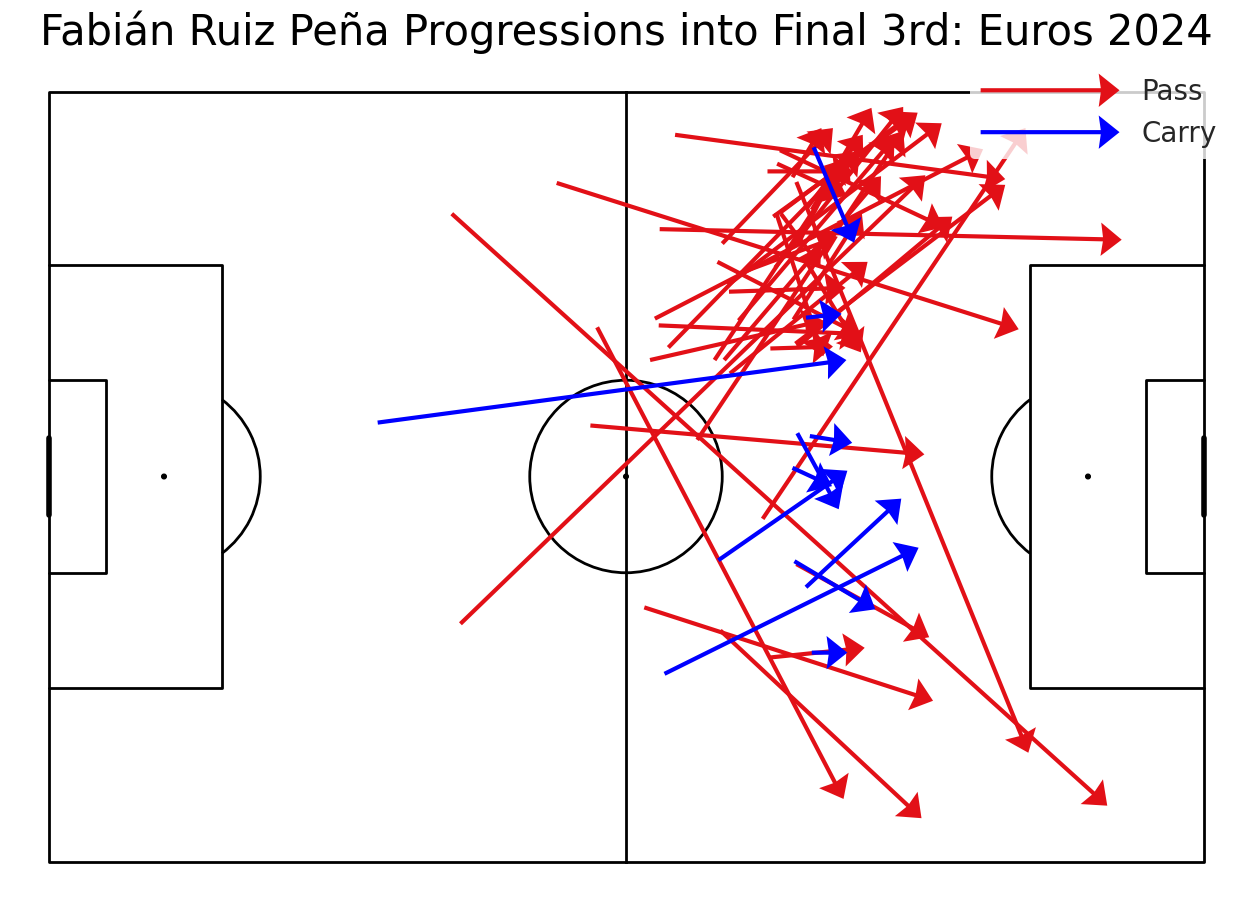

In [ ]:
#visualise for a given player
player_name=player_key

player_passes=final_third_passes[(final_third_passes.player==player_name)]
player_carries=final_third_carries[(final_third_carries.player==player_name)]

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

#plot the passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

#plot the carries
pitch.arrows(player_carries.x, player_carries.y,
player_carries.carry_end_x, player_carries.carry_end_y, width=3,
headwidth=8, headlength=5, color=carry_colour, ax=ax, zorder=2, label = "Carry")

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{player_name} Progressions into Final 3rd: Euros 2024', fontsize=30,color='black')

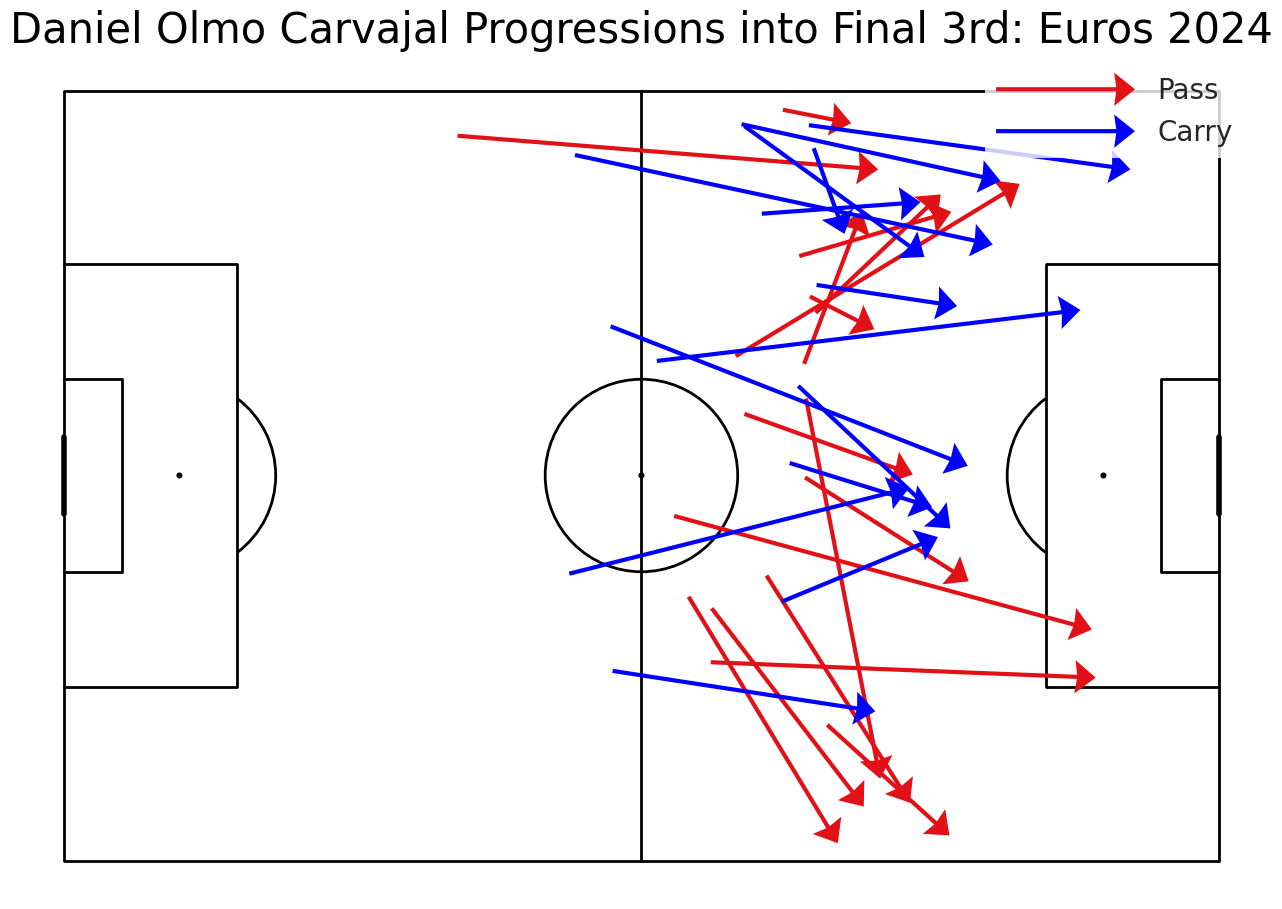

In [ ]:
#visualise for a given player
player_name=player_1

player_passes=final_third_passes[(final_third_passes.player==player_name)]
player_carries=final_third_carries[(final_third_carries.player==player_name)]

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

#plot the passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

#plot the carries
pitch.arrows(player_carries.x, player_carries.y,
player_carries.carry_end_x, player_carries.carry_end_y, width=3,
headwidth=8, headlength=5, color=carry_colour, ax=ax, zorder=2, label = "Carry")

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{player_name} Progressions into Final 3rd: Euros 2024', fontsize=30,color='black')

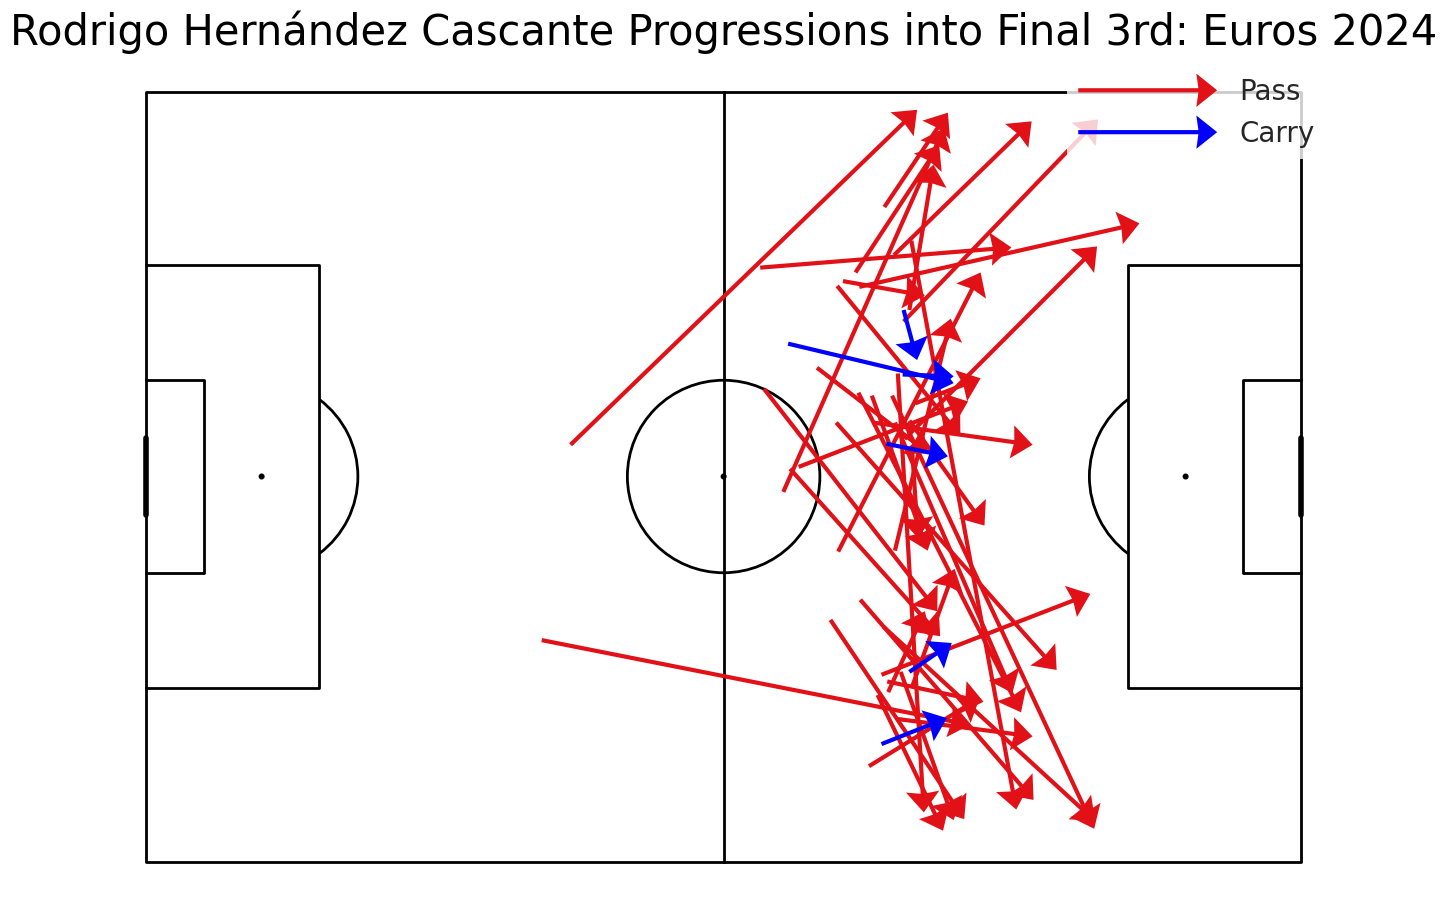

In [ ]:
#visualise for a given player
player_name=player_2

player_passes=final_third_passes[(final_third_passes.player==player_name)]
player_carries=final_third_carries[(final_third_carries.player==player_name)]

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

#plot the passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

#plot the carries
pitch.arrows(player_carries.x, player_carries.y,
player_carries.carry_end_x, player_carries.carry_end_y, width=3,
headwidth=8, headlength=5, color=carry_colour, ax=ax, zorder=2, label = "Carry")

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{player_name} Progressions into Final 3rd: Euros 2024', fontsize=30,color='black')

In [ ]:
touches=['Pass', 'Ball Receipt*', 'Carry', 'Clearance', 'Foul Won', 'Block',
'Ball Recovery', 'Duel', 'Dribble', 'Interception', 'Miscontrol', 'Shot']

In [ ]:
player1_df=events_df[(events_df.player==player_key)&(events_df.type.isin(touches))]
player2_df=events_df[(events_df.player==player_1)&(events_df.type.isin(touches))]

In [ ]:
#create colour map
colour1="white"
colour2="#c3c3c3"
colour3="#e21017"
cmaplist = [colour1, colour2, colour3]
cmap = LinearSegmentedColormap.from_list("", cmaplist)

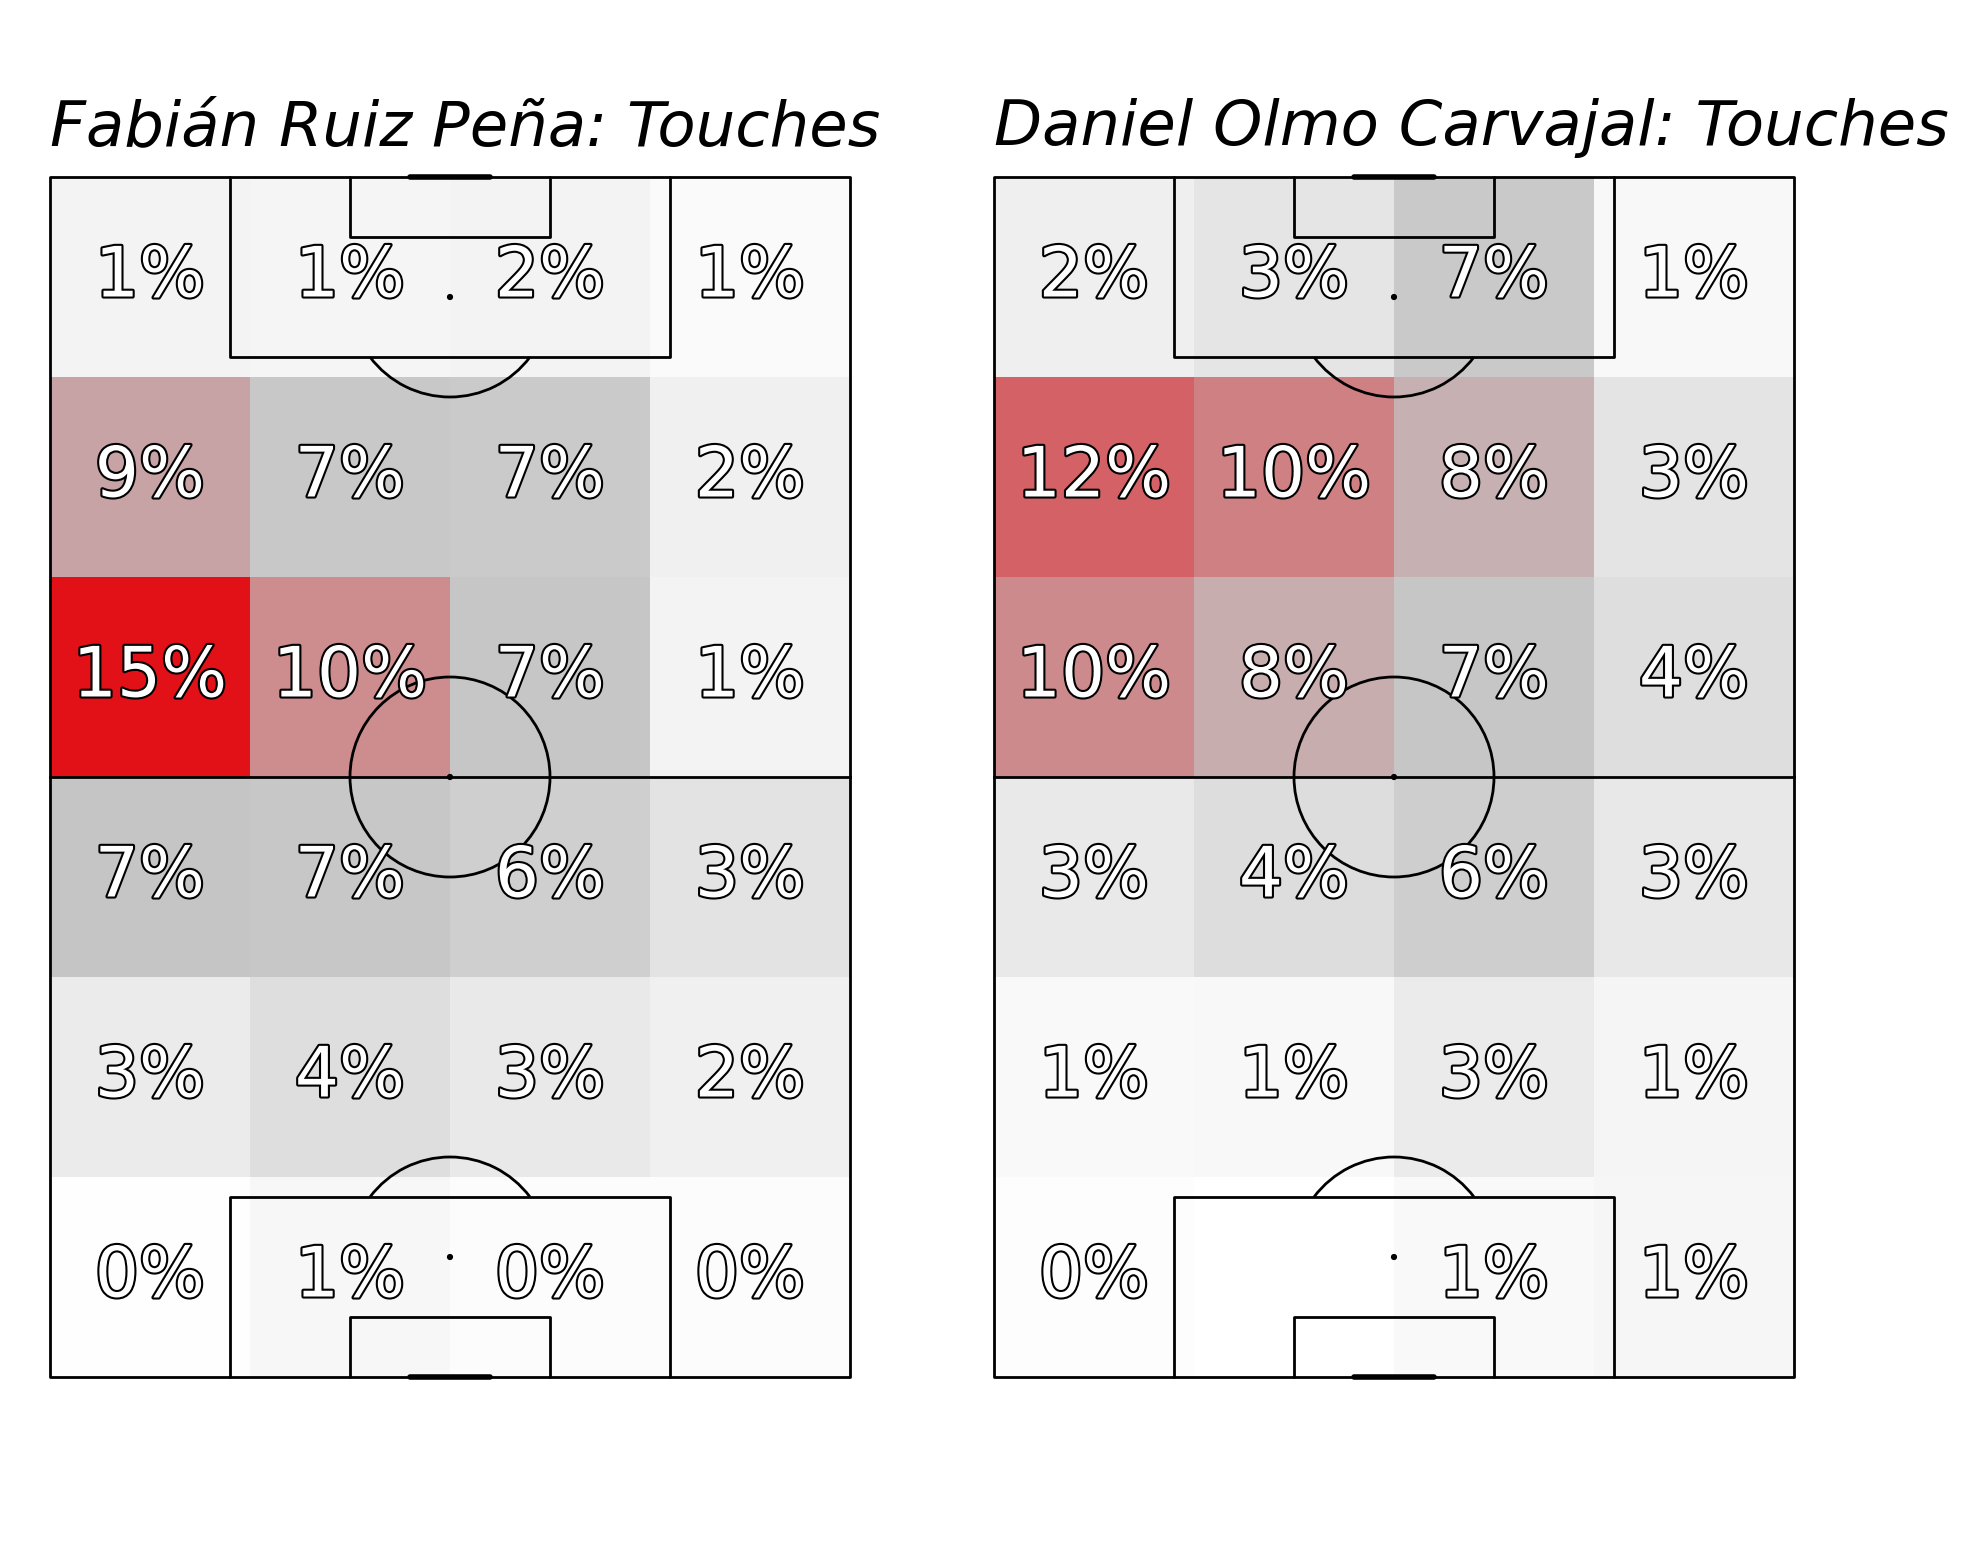

In [ ]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

#create a grid of pitches
#define pitch style
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, line_color='#000000', linewidth=2,half=False)

#create a grid - in this example, one row of two pitches
fig, axs = pitch.grid(nrows=1, ncols=2
                      ,figheight=16,
                      grid_width=0.65,
                      endnote_height=0.03, endnote_space=0.05,
                      axis=False,title_space=0.02, title_height=0.06, grid_height=0.8)

#get data for heatmap
#player1
bin_statistic1 = pitch.bin_statistic(player1_df.x, player1_df.y, statistic='count',
bins=(6, 4),normalize=True)
#player2
bin_statistic2 = pitch.bin_statistic(player2_df.x, player2_df.y, statistic='count',
bins=(6, 4),normalize=True)

#calculate vmax value
#we want both our heatmaps to use the same colour spectrum
vmax1=bin_statistic1['statistic'].max()
vmax2=bin_statistic2['statistic'].max()

if vmax1>vmax2:
  vmax=vmax1
else:
  vmax=vmax2

#set vmin as zero
vmin=0

#plot heatmap for player1
heatmap1 = pitch.heatmap(bin_statistic1, ax=axs['pitch'][0], cmap=cmap, vmax=vmax, vmin=vmin)

#add percentages for each zone
annotate1 = pitch.label_heatmap(bin_statistic1, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][0],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

#add name of player to the top of the heatmap
ax_text(0, 125, f'{player_key}: Touches', ha='left', c='black',va='center', fontsize=45,ax=axs['pitch'][0],style='italic')


#plot heatmap for player2
heatmap2 = pitch.heatmap(bin_statistic2, ax=axs['pitch'][1], cmap=cmap, vmax=vmax, vmin=vmin)

#add percentages for each zone
annotate2 = pitch.label_heatmap(bin_statistic2, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][1],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

#add name of player to the top of the heatmap
ax_text(0, 125, f'{player_1}: Touches', ha='left', c='black',va='center', fontsize=45,ax=axs['pitch'][1],style='italic')